[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chanwkimlab/MarcoPolo/blob/main/notebooks/tutorial.ipynb)

## Setup

**Start the colab kernel with GPU**: Runtime -> Change runtime type -> GPU

### Install dependencies

In [ ]:
!pip install marcopolo-pytorch

### Prepare data

You can use **(1) example data** or **(2) your own data**.

#### (1) example data
We have prepared two example data: the human embryogenic stem cell (hESC) dataset of Koh et al. and the liver dataset of MacParland et al.    

In [ ]:
!wget https://raw.githubusercontent.com/chanwkimlab/MarcoPolo/main/notebooks/example/hESC.h5ad
!wget https://raw.githubusercontent.com/chanwkimlab/MarcoPolo/main/notebooks/example/HumanLiver.h5ad
    
anndata_path = "hESC.h5ad"

#### (2) your own data
You can upload your own AnnData single cell file to this session. If you intend to use the example data, please run the following cell and upload your data.

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=file_name, length=len(uploaded[file_name])))
    
anndata_path = file_name

In [2]:
# Import packages
import pickle

import numpy as np
import pandas as pd
import torch
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

import MarcoPolo

assert torch.cuda.is_available(), "Make sure that you started the colab kernel with GPU: Runtime -> Change runtime type -> GPU"

In [3]:
# Read anndata. `anndata_path` should be in a `h5ad` format.
adata = ad.read(anndata_path)
adata

AnnData object with n_obs × n_vars = 446 × 14694
    obs: 'size_factor', 'TSNE_1', 'TSNE_2', 'cell_type'
    var: 'total_counts'
    obsm: 'X_tsne'

In [4]:
adata=adata[:, :1020]

In [5]:
# Calculate size factor
if "size_factor" not in adata.obs.columns:
    norm_factor = sc.pp.normalize_total(adata, exclude_highly_expressed=True, max_fraction= 0.2, inplace=False)["norm_factor"]
    adata.obs["size_factor"] = norm_factor/norm_factor.mean()
    print("size factor was calculated")

In [6]:
# (1) Run regression
regression_result = MarcoPolo.run_regression(adata=adata, size_factor_key="size_factor",
                         num_threads=4, device="cuda:3")

with open(f"{anndata_path}.regression_result.pickle", "wb") as f:
    pickle.dump(regression_result, f)

<INFO> Currently, you are using 4 threads for regression. If you encounter any memory issues, try to set `num_threads` to 1.
The numbers of clusters to test: [1, 2]
Y: (446, 1020) X: (446, 1) s: (446,)
(1) Fitting with 1 cluster(s)


Progress:   0%|          | 0/255 [00:00<?, ?it/s]

(2) Fitting with 2 cluster(s)


Progress: 100%|██████████| 255/255 [00:54<00:00,  4.69it/s]


In [7]:
# (2) Find markers
markers_result = MarcoPolo.find_markers(adata=adata, regression_result=regression_result)
with open(f"{anndata_path}.markers_result.pickle", "wb") as f:
    pickle.dump(markers_result, f)

Assign cells to on-cells and off-cells
Calculating voting score...
Calculating proximity score
Calculating bimodality score


/homes/gws/chanwkim/miniconda3/envs/marcopolo/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/homes/gws/chanwkim/miniconda3/envs/marcopolo/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Calculating MarcoPolo score


In [6]:
# (2) Find markers
markers_result_ = MarcoPolo.find_markers(adata=adata, regression_result=regression_result)

Assign cells to on-cells and off-cells...
Calculating voting score...
Calculating proximity score...
Calculating bimodality score...


/homes/gws/chanwkim/MarcoPolo/MarcoPolo/summarization/summarizer.py:72: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  expression_matrix_norm_scale[expression_matrix_norm_scale > PCA_norm_thres] = PCA_norm_thres


Calculating MarcoPolo score...


In [ ]:
# Obtain tSNE coordinates if it does not exist in the adata.
if "X_tsne" not in adata.obsm.keys():
    sc.tl.tsne(adata=adata)

Assign cells to on-cells and off-cells...
Annotating genes with the gene info: https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz


100%|█████████████| 1020/1020 [00:17<00:00, 59.43it/s, Num. of unmatched genes=47]


47 not matched genes: ENSG00000198804, ENSG00000210082, ENSG00000198712, ENSG00000198938, ENSG00000198727, ENSG00000211459, ENSG00000198899, ENSG00000198886, ENSG00000198763, ENSG00000198888, ENSG00000198786, ENSG00000212907, ENSG00000225840, ENSG00000274474, ENSG00000183311, ENSG00000223367, ENSG00000226225, ENSG00000235650, ENSG00000096150, ENSG00000273673, ...
Generating table files...


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Generating image files...
Drawing figures
size factor corrected


  0%|                                                    | 0/1000 [00:00<?, ?it/s]

> /homes/gws/chanwkim/MarcoPolo/MarcoPolo/visualization/reporter.py(219)generate_image_files()
    218         import ipdb; ipdb.set_trace()
--> 219         exp_data_corrected_on = expression_matrix.T[iter_idx][gamma_argmax_list[iter_idx] == 0]
    220         exp_data_corrected_off = expression_matrix.T[iter_idx][gamma_argmax_list[iter_idx] == 1]

ipdb> c


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  0%|                                          | 1/1000 [00:03<1:01:58,  3.72s/it]

> /homes/gws/chanwkim/MarcoPolo/MarcoPolo/visualization/reporter.py(218)generate_image_files()
    217                         fig.add_subplot(gs[0:6, 6 + 2:6 + 2 + 6])]
--> 218         import ipdb; ipdb.set_trace()
    219         exp_data_corrected_on = expression_matrix.T[iter_idx][gamma_argmax_list[iter_idx] == 0]

ipdb> c


  0%|                                            | 2/1000 [00:05<46:56,  2.82s/it]

> /homes/gws/chanwkim/MarcoPolo/MarcoPolo/visualization/reporter.py(219)generate_image_files()
    218         import ipdb; ipdb.set_trace()
--> 219         exp_data_corrected_on = expression_matrix.T[iter_idx][gamma_argmax_list[iter_idx] == 0]
    220         exp_data_corrected_off = expression_matrix.T[iter_idx][gamma_argmax_list[iter_idx] == 1]

ipdb> exit


  0%|                                         | 2/1000 [01:36<13:21:09, 48.17s/it]


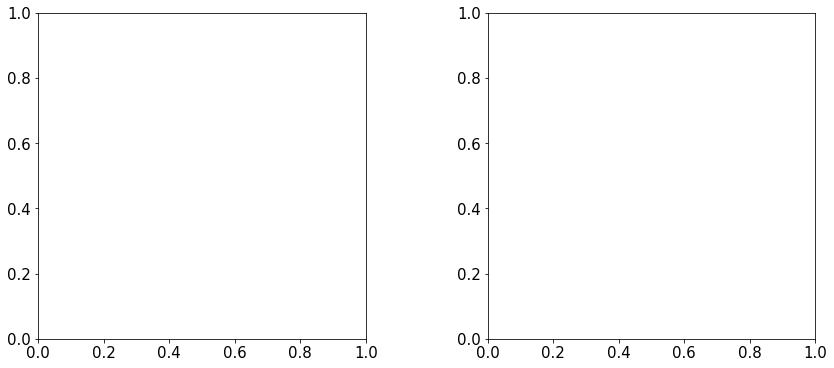

In [5]:
# (3) Generate report
MarcoPolo.generate_report(adata=adata, size_factor_key="size_factor", 
                          regression_result=regression_result, 
                          gene_scores=markers_result, 
                          output_dir="./",  
                          low_dim_key="X_tsne",
                          cell_color_key="cell_type",
                          gene_info_path="https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz")

In [1]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

anndata_path="hESC.h5ad"  
import pickle
with open(f"{anndata_path}.regression_result.pickle", "rb") as f:
    regression_result=pickle.load(f) 
    
with open(f"{anndata_path}.markers_result.pickle", 'rb') as f:
    markers_result=pickle.load(f)

/homes/gws/chanwkim/MarcoPolo/notebooks
/homes/gws/chanwkim/MarcoPolo


In [ ]:
# Import packages
import pickle

import numpy as np
import pandas as pd
import torch
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

import MarcoPolo

assert torch.cuda.is_available(), "Make sure that you started the colab kernel with GPU: Runtime -> Change runtime type -> GPU"

In [ ]:
# Read anndata. `anndata_path` should be in a `h5ad` format.
adata = ad.read(anndata_path)
adata

In [ ]:
!tar -zcvf report.tar.gz report